# MOwNiT – interpolacja

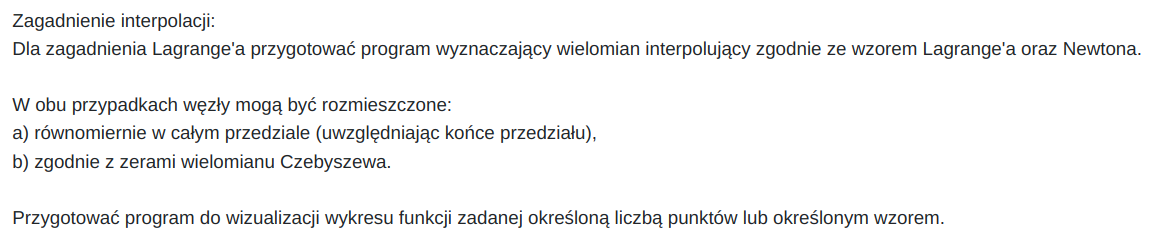

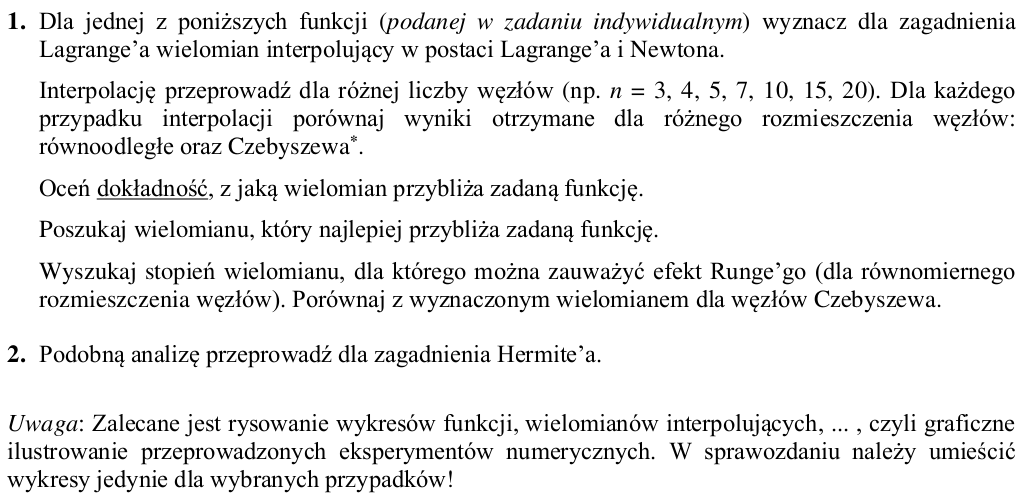

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange

In [2]:
def even_distribution(start, stop, n):
    return np.linspace(start, stop, num=n)

In [3]:
def chebyshev_distribution(start, stop, n):
    chebyt_roots = []
    for k in range(1, n+1):
        cosin = np.cos((2*k-1)/(2*n) * np.pi)
        curr_result = 0.5*(start+stop) + 0.5*(stop-start)*cosin
        chebyt_roots.append(curr_result)
    return np.array(chebyt_roots)

## Function to interpolate

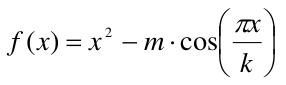

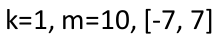

In [4]:
def func_to_interpolate(x):
    k = 1
    m = 10
    y = x**2 - m*np.cos((np.pi*x) / k)
    return y

## Visualization

In [5]:
def visualize_scipy(x, y, function, n):
    plt.figure(figsize=(8,6))
    plt.scatter(x, y, label="data", color="red")
    plt.plot(x, function(x), label = "Lagrange")
    plt.title(f"Lagrange'a Polynomial Interpolation using SciPy on {n} nodes")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.show()

In [6]:
def visualize(x, y, function, n):
    plt.figure(figsize=(8,6))
    plt.scatter(x, y, label="data", color="red")
    plt.plot(x, function(x, x, y), label = "Lagrange")
    if function.__name__ == "lagrange_interpolation":
        plt.title(f"Lagrange'a Polynomial Interpolation on {n} nodes")
    elif function.__name__ == "newton_interpolation":
        plt.title(f"Newton’s Polynomial Interpolation on {n} nodes")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.show()

## Lagrange'a Polynomial Interpolation

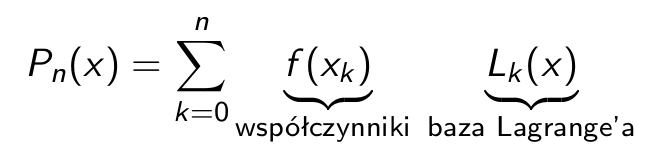

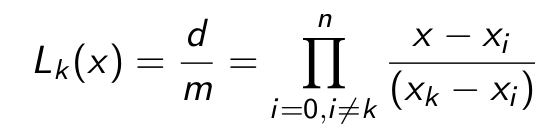

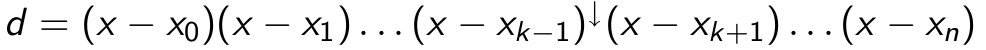
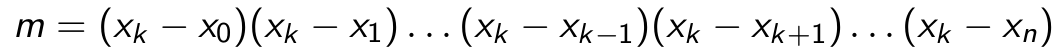

### using scipy

In [7]:
def lagrange_scipy(start, stop, n):
    # even distribution
    even_x = even_distribution(start, stop, n)
    even_y = func_to_interpolate(even_x)
    even_poly = lagrange(even_x, even_y)
    visualize_scipy(even_x, even_y, even_poly, n)

    # chebyshev distribution
    chebyt_x = chebyshev_distribution(start, stop, n)
    chebyt_y = func_to_interpolate(chebyt_x)
    chebyt_poly = lagrange(chebyt_x, chebyt_y)
    visualize_scipy(chebyt_x, chebyt_y, chebyt_poly, n)

**n = 3**

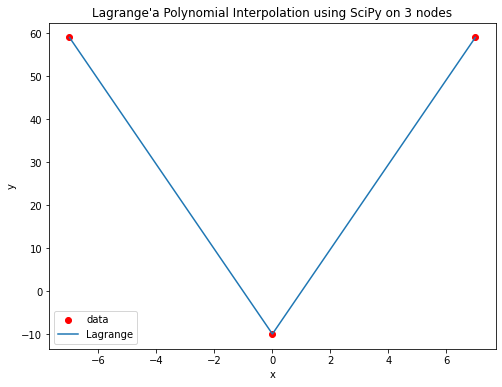

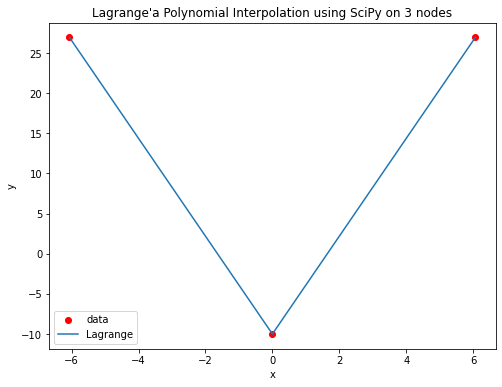

In [8]:
lagrange_scipy(-7, 7, 3)

**n = 10**

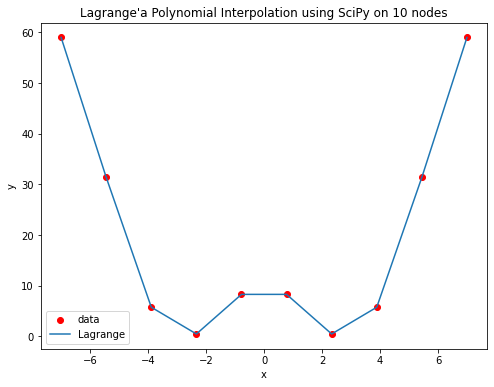

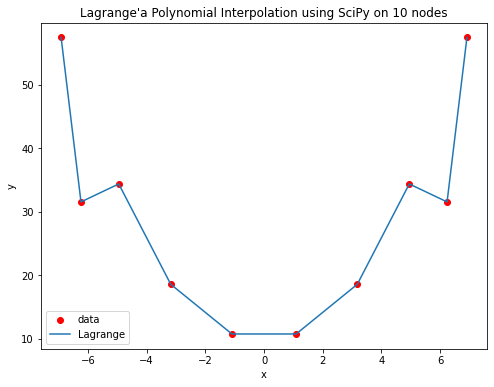

In [9]:
lagrange_scipy(-7, 7, 10)

### own implementation

In [10]:
def calculate_Lk(X, xk, k, x_points):
    d = m = 1
    for i in range(len(x_points)):
        if i != k:
            d *= (X - x_points[i])
    for i in range(len(x_points)):
        if i != k:
            m *= (xk - x_points[i])
    return d/m

def lagrange_interpolation(X, x, y):
    result = 0
    for k in range(len(x)):
        result += y[k] * calculate_Lk(X, x[k], k, x)
    return result

In [11]:
def lagrange_own_implementation(start, stop, n):
    # even distribution
    even_x = even_distribution(start, stop, n)
    even_y = func_to_interpolate(even_x)
    visualize(even_x, even_y, lagrange_interpolation, n)
    
    # chebyshev distribution
    chebyt_x = chebyshev_distribution(start, stop, n)
    chebyt_y = func_to_interpolate(chebyt_x)
    visualize(chebyt_x, chebyt_y, lagrange_interpolation, n)

**n = 5**

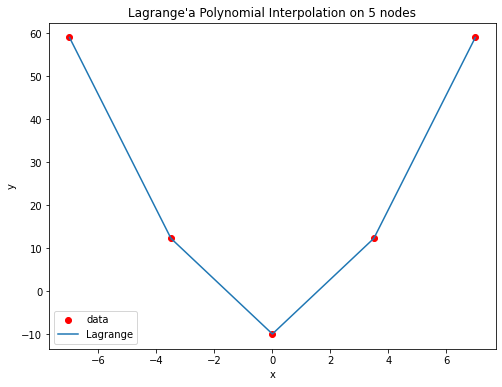

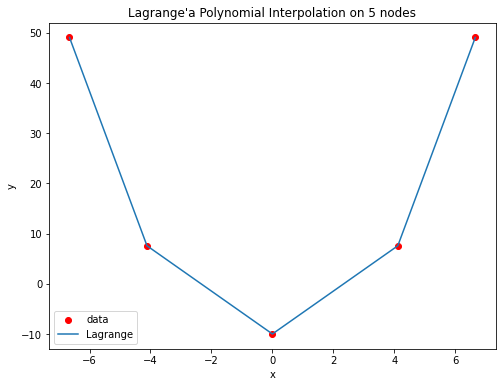

In [12]:
lagrange_own_implementation(-7, 7, 5)

**n = 20**

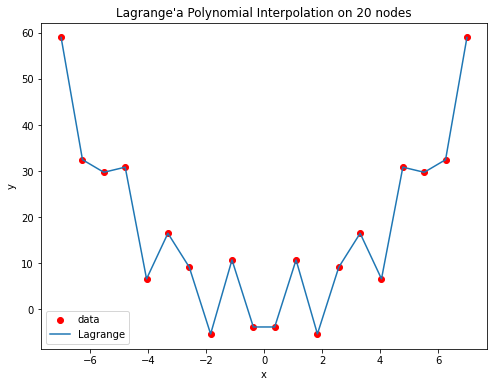

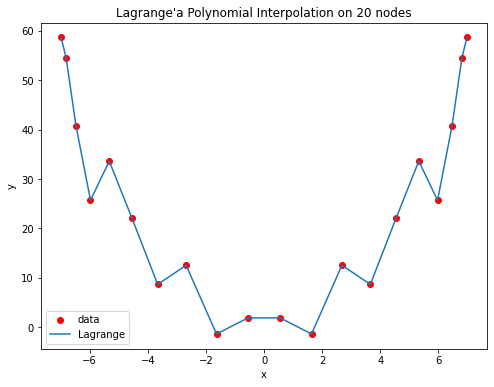

In [13]:
lagrange_own_implementation(-7, 7, 20)

## Newton’s Polynomial Interpolation

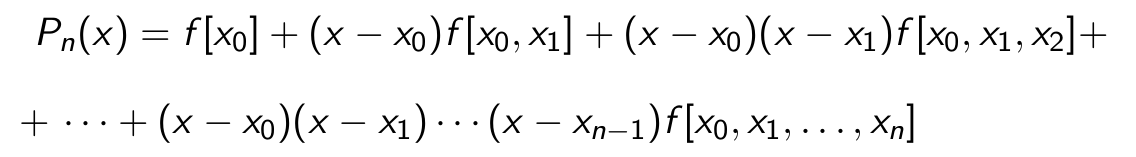

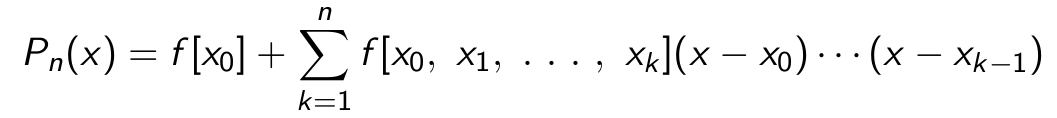

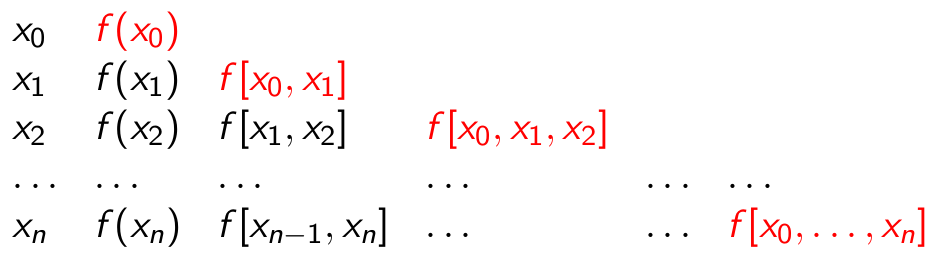

### own implementation

In [14]:
def newton_interpolation(X, x, y):
    table_of_dd = [[None for _ in range(len(x))] for _ in range(len(x))]
    y_values = [None for _ in range(len(x))]
    
    for i in range(len(x)):
        table_of_dd[i][0] = y[i]
    for j in range(1, len(x)):
        for i in range(len(x)-j):
            table_of_dd[i][j] = (table_of_dd[i+1][j-1] - table_of_dd[i][j-1])/(x[i+j]-x[i])
            
    xterm = 1
    y_values[0] = table_of_dd[0][0]
    for i in range(1, len(x)):
        xterm *= (X - x[i-1])
        y_values[i] = y_values[i-1] + table_of_dd[0][i]*xterm
        
    return y_values[-1]

In [15]:
def newton_own_implementation(start, stop, n):
    # even distribution
    even_x = even_distribution(start, stop, n)
    even_y = func_to_interpolate(even_x)
    visualize(even_x, even_y, newton_interpolation, n)
    
    # chebyshev distribution
    chebyt_x = chebyshev_distribution(start, stop, n)
    chebyt_y = func_to_interpolate(chebyt_x)
    visualize(chebyt_x, chebyt_y, newton_interpolation, n)

**n = 4**

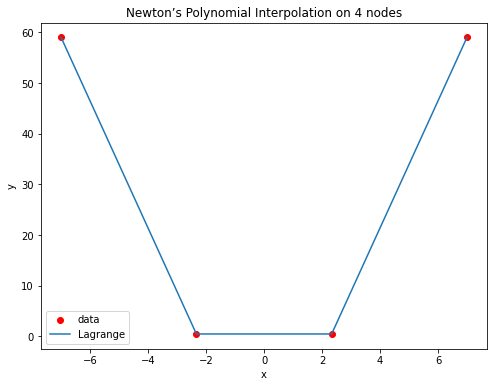

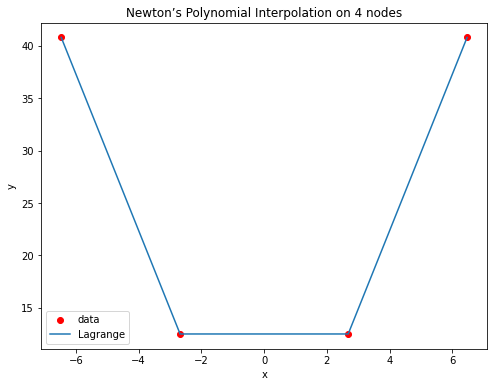

In [16]:
newton_own_implementation(-7, 7, 4)

**n = 7**

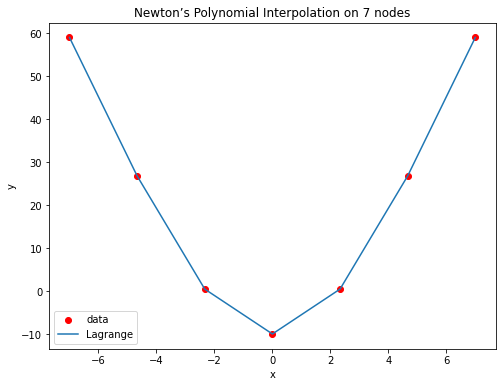

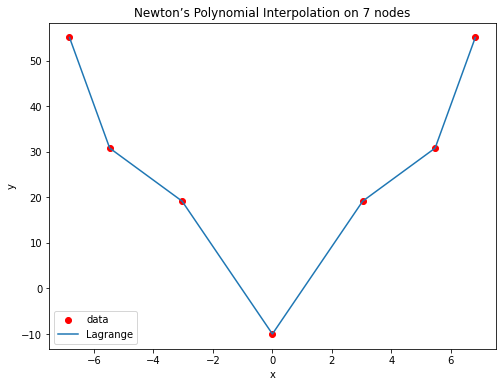

In [17]:
newton_own_implementation(-7, 7, 7)

**n = 15**

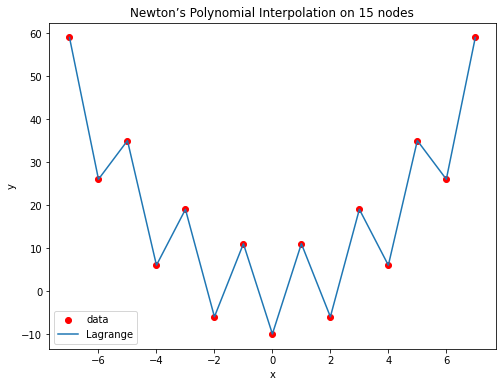

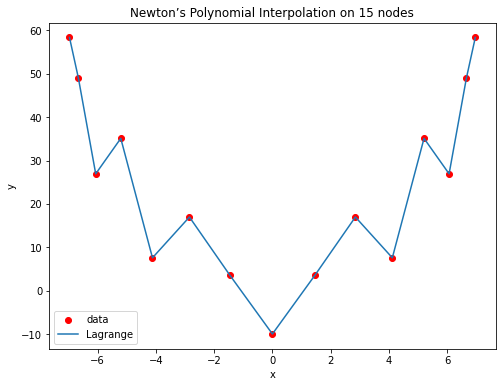

In [18]:
newton_own_implementation(-7, 7, 15)